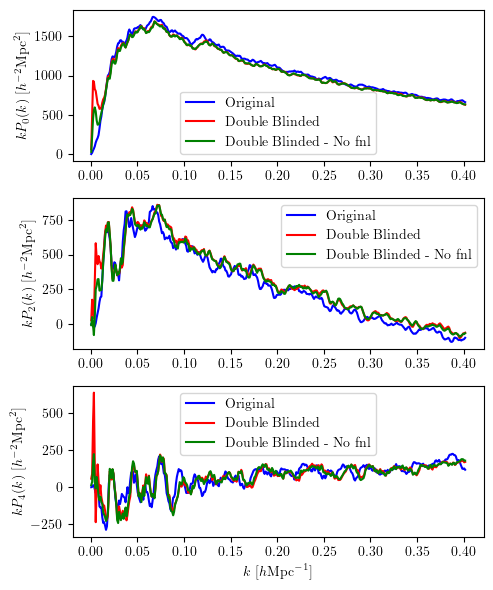

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pypower import PowerSpectrumStatistics

plt.rcParams.update({"text.usetex": True, 'font.family': 'serif'})

# Paths to the Pk files
file1 = "/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/pk/pkpoles_LRG_GCcomb_0.4_0.6_default_FKP_lin.npy"
file2 = "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/LSScats/v0.6/blinded/pk/pkpoles_LRG_GCcomb_0.4_0.6_default_FKP_lin.npy"
file3 = "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/nofnl/LSScats/v0.6/blinded//pk/pk/pkpoles_LRG_GCcomb_0.4_0.6_default_FKP_lin.npy"

colors = ['blue', 'red', 'green']
labels = ['Original', 'Double Blinded', 'Double Blinded - No fnl']

plt.figure(figsize=(5, 6))

k = PowerSpectrumStatistics.load(file1).k

files = [file1, file2, file3]
for j, file in enumerate(files):
    ps = PowerSpectrumStatistics.load(file)(ell=[0, 2, 4], complex=False)
    
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(k, k * ps[i, :], color=colors[j], label=labels[j])

plt.subplot(311)
plt.ylabel(r"$kP_{0}(k)$ $[h^{-2} \mathrm{Mpc}^{2}]$")
plt.legend()
plt.subplot(312)
plt.ylabel(r"$kP_{2}(k)$ $[h^{-2} \mathrm{Mpc}^{2}]$")
plt.legend()
plt.subplot(313)
plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$kP_{4}(k)$ $[h^{-2} \mathrm{Mpc}^{2}]$")
plt.legend()

plt.tight_layout()
plt.show()


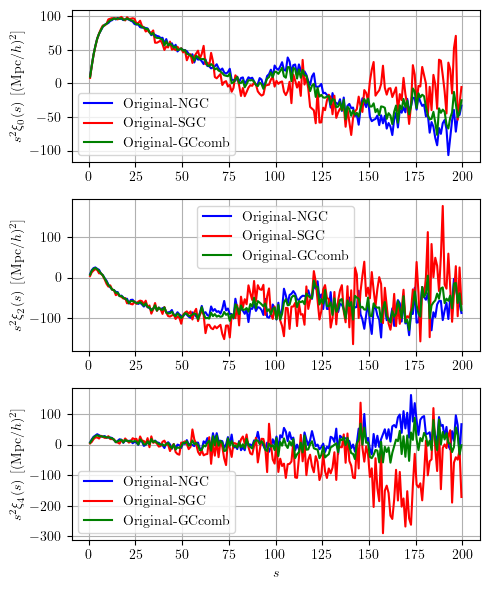

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction

plt.rcParams.update({"text.usetex": True, 'font.family': 'serif'})

# Placeholder paths
file1 = "/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_NGC_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"
file2 =  "/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_SGC_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"
file3 =  "/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_GCcomb_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"

# file4 = "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_NGC_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"
# file5 = "/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_SGC_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"
# file6 = "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_SGC_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"

colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']
labels = ['Original-NGC', 'Original-SGC', 'Original-GCcomb']

plt.figure(figsize=(5, 6))

# Specifying the multipoles you want
ells = (0, 2, 4)

files = [file1, file2, file3]
for j, file in enumerate(files):
    # Load the correlation function data
    result = TwoPointCorrelationFunction.load(file)
    
    # Extract the correlation function data from xi_obj using the result method
    s, xiell = result(ells=ells, return_sep=True)
    
    for ill, ell in enumerate(ells):
        plt.subplot(3, 1, ill+1)
        plt.plot(s, s**2 * xiell[ill], color=colors[j], label=labels[j])
        # plt.ylabel(r'$s \xi_{{{:d}}}(s)$'.format(ell))
        plt.ylabel(r'$s^{2} \xi_%d(s)$ [$(\mathrm{Mpc}/h)^{2}$]' % ell)

        plt.legend()
        plt.grid(True)

plt.subplot(3, 1, 3)
plt.xlabel(r"$s$")

plt.tight_layout()
plt.show()


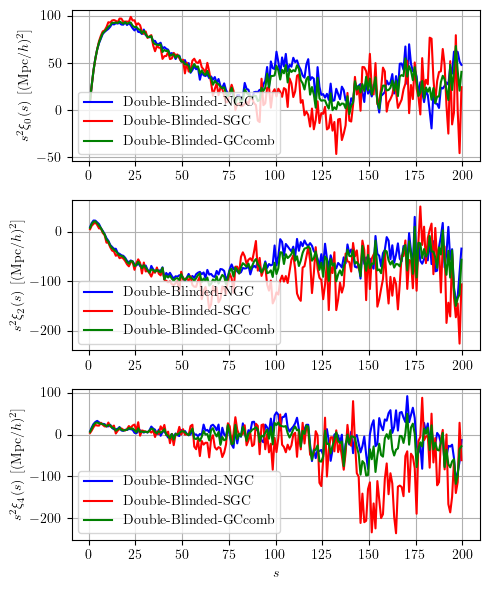

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction

plt.rcParams.update({"text.usetex": True, 'font.family': 'serif'})

# Placeholder paths
file1 = "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_NGC_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"
file2 =  "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_SGC_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"
file3 =  "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/LSScats/v0.6/blinded/xi/smu/allcounts_LRG_GCcomb_0.4_0.6_default_FKP_lin_njack0_nran4_split20.npy"

colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']
labels = ['Double-Blinded-NGC', 'Double-Blinded-SGC', 'Double-Blinded-GCcomb']

plt.figure(figsize=(5, 6))

# Specifying the multipoles you want
ells = (0, 2, 4)

files = [file1, file2, file3]
for j, file in enumerate(files):
    # Load the correlation function data
    result = TwoPointCorrelationFunction.load(file)
    
    # Extract the correlation function data from xi_obj using the result method
    s, xiell = result(ells=ells, return_sep=True)
    
    for ill, ell in enumerate(ells):
        plt.subplot(3, 1, ill+1)
        plt.plot(s, s**2 * xiell[ill], color=colors[j], label=labels[j])
        # plt.ylabel(r'$s \xi_{{{:d}}}(s)$'.format(ell))
        plt.ylabel(r'$s^{2} \xi_%d(s)$ [$(\mathrm{Mpc}/h)^{2}$]' % ell)

        plt.legend()
        plt.grid(True)

plt.subplot(3, 1, 3)
plt.xlabel(r"$s$")

plt.tight_layout()
plt.show()
